<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#FOV-Function" data-toc-modified-id="FOV-Function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>FOV Function</a></span></li><li><span><a href="#Nyquist-Theorem" data-toc-modified-id="Nyquist-Theorem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nyquist Theorem</a></span></li><li><span><a href="#Aliasing" data-toc-modified-id="Aliasing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Aliasing</a></span></li><li><span><a href="#Sampling-at-Nyquist-Frequency" data-toc-modified-id="Sampling-at-Nyquist-Frequency-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sampling at Nyquist Frequency</a></span></li><li><span><a href="#Wrap-Around" data-toc-modified-id="Wrap-Around-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Wrap Around</a></span></li></ul></div>

# Field of View

In [1]:
import BrukerMRI as bruker
import pylab as pl
import plot
#Python method of extracting raw Bruker Files
import BrukerMRI as bruker

# Modules
import pandas as pd
import pydicom as dcm
import math
import numpy as np
import matplotlib.pyplot as plt
import glob
from os.path import expanduser
import os
from matplotlib import cm
import cmath

In [2]:
# copy and paste entire directory but replace "\" with "/"
# Place a "/" at the end of the line
MainDir = "C:/Users/daniala/Desktop/mri/20191210_104049_MRMD_phantom_practice_1_3/"
ExpNum = 8
Experiment = bruker.ReadExperiment(MainDir, ExpNum)
acqp = Experiment.acqp
method = Experiment.method
raw_fid = Experiment.raw_fid
k_space_gen = Experiment.GenerateKspace()
k_space = Experiment.k_data
k_sp = bruker.phase_shift(120,0,k_space)[:,:,0]

## FOV Function

In [4]:
def FOV_reduction_row(reduction_factor,k_sp):
    row = k_sp.shape[0]
    col = k_sp.shape[1]
    k_sp2 = k_sp.copy()
    dimension = int(row/reduction_factor)
    new_k = np.zeros((dimension,row),dtype=complex)
    
    for i in range(0,dimension):
       new_k[i,:] = k_sp[(i*reduction_factor),:]
        
    return new_k

In [5]:
def FOV_reduction_col(reduction_factor,k_sp):
    row = k_sp.shape[0]
    col = k_sp.shape[1]
    k_sp2 = k_sp.copy()
    dimension = int(col/reduction_factor)
    new_k = np.zeros((row,dimension),dtype=complex)
    
    for i in range(0,dimension):
       new_k[:,i] = k_sp2[:,(i*reduction_factor)]
        
    return new_k

In [6]:
fh_2= FOV_reduction_row(2,k_sp)
fh_4 = FOV_reduction_row(4,k_sp)
fv_2 = FOV_reduction_col(2,k_sp)
fv_4 = FOV_reduction_col(4,k_sp)
fvh_2 = FOV_reduction_col(2,fh_2)
fvh_4 = FOV_reduction_col(4,fh_4)

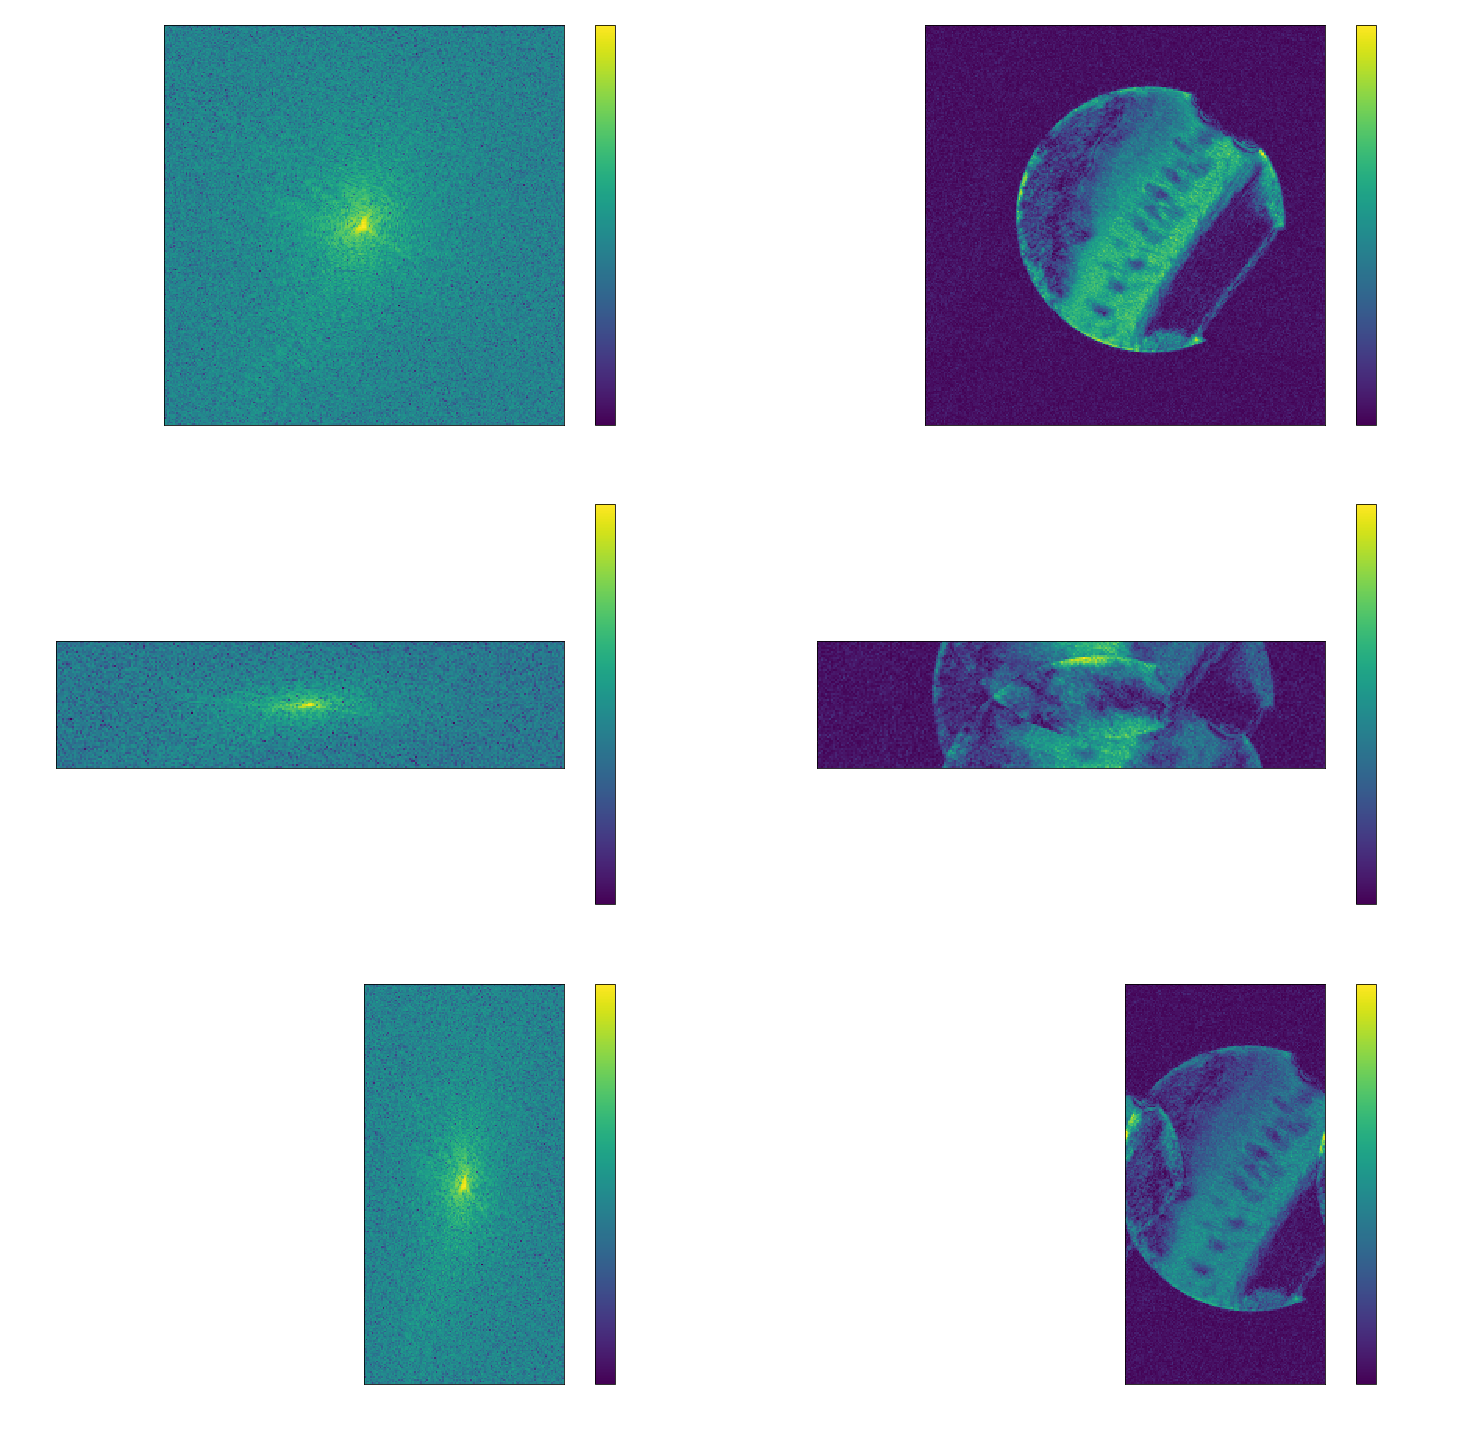

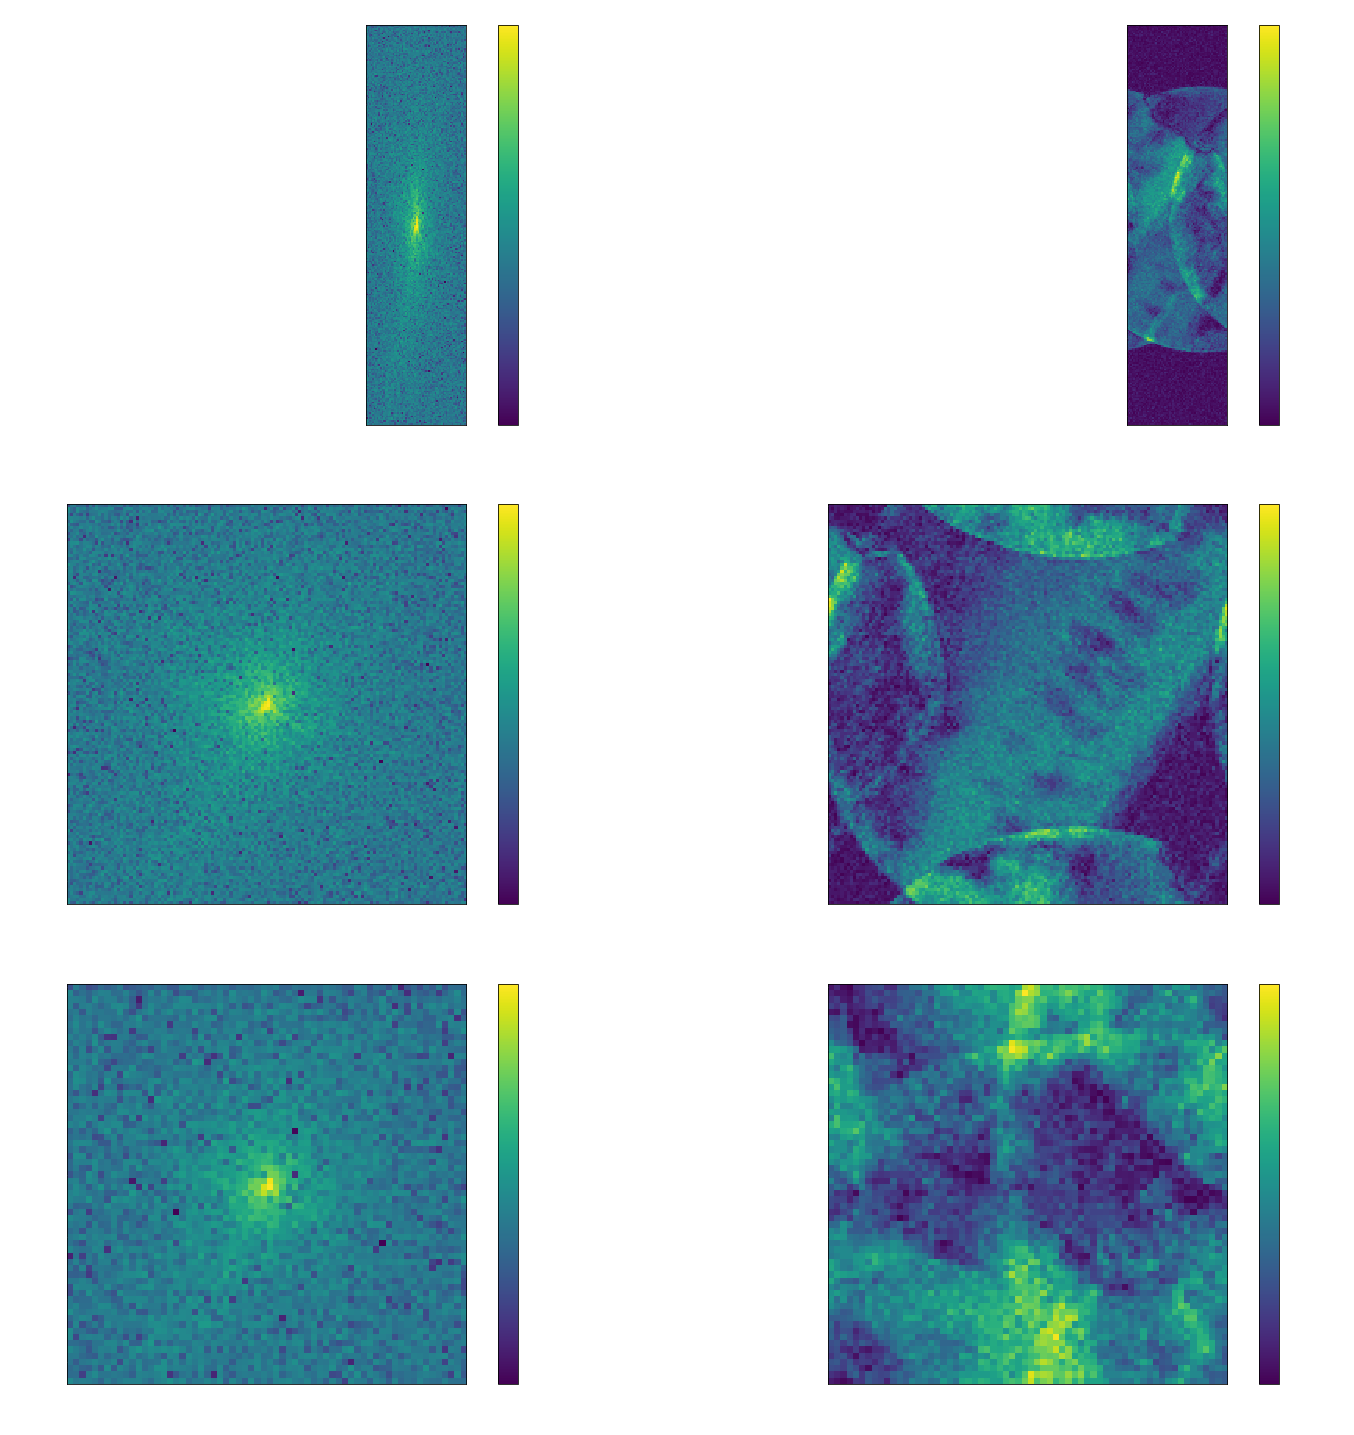

In [7]:
k_spaces = { 'Original K-space': k_sp,
            'FOV_reduction_row by 4': fh_2,
            'FOV_reduction_row by 4': fh_4,
            'FOV_reduction_v by 2': fv_2,
            }

k_spaces2 = { 'FOV_reduction_v by 4': fv_4,
            'FOV_reduction_vh by 2': fvh_2,
            'FOV_reduction_vh by 4': fvh_4
            }

plot.comparison_k_plots(k_spaces)
plot.comparison_k_plots(k_spaces2)

## Nyquist Theorem

Nyquist Sampling Theorem
The Nyquist Sampling Theorem states that:

A bandlimited continuous-time signal can be sampled and perfectly reconstructed from its samples if the waveform is sampled over twice as fast as it's highest frequency component.

\begin{equation*}
\mathbf{f}_{max}  <  \mathbf{f}_s/2
\end{equation*}



## Aliasing

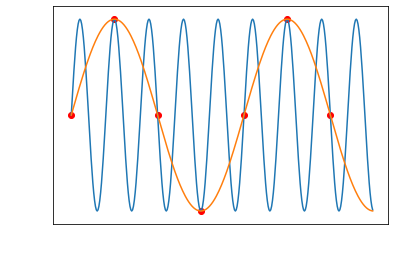

In [196]:
x= np.array(range(350))
#Contimous Time Signal
y_1= np.sin(2.5*x*np.pi/50)

# Resultant Signal based on Sampling
y_s= np.sin(0.5*x*np.pi/50)
plt.plot(x,y)
plt.plot(x,y_s,'-')

#Discrete Sampling
x_sample= np.array(range(0,350,50))
y_sample= np.sin(0.5*x_sample*np.pi/50)
plt.scatter(x_sample,y_sample,c='r')

The sin function in orange, y, has a frequency of 2.5. When the functions are sampled (red dots) at a frequency lower than twice the frquency of y, it causes aliasing as the resultant reconstructed function from the discrete sampling is a misrepresentation of the original signal.

## Sampling at Nyquist Frequency

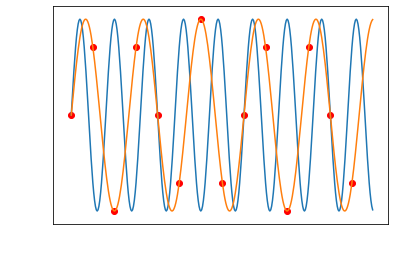

In [193]:
x= np.array(range(350))
#Contimous Time Signal
y_1= np.sin(2.5*x*np.pi/50)
y_s= np.sin(1.5*x*np.pi/50)
plt.plot(x,y)
plt.plot(x,y_s,'-')

#Discrete Sampling
x_sample= np.array(range(0,350,25))
y_sample= np.sin(1.5*x_sample*np.pi/50)
plt.scatter(x_sample,y_sample,c='r')

## Wrap Around

Phase wrap-around is a commonly seen MR artifact that occurs whenever the dimensions of an object exceed the defined field-of-view (FOV).  It is one particular manifestation of the aliasing phenomenon and is generally easily recognized as a folding over of anatomic parts into the area of interest.

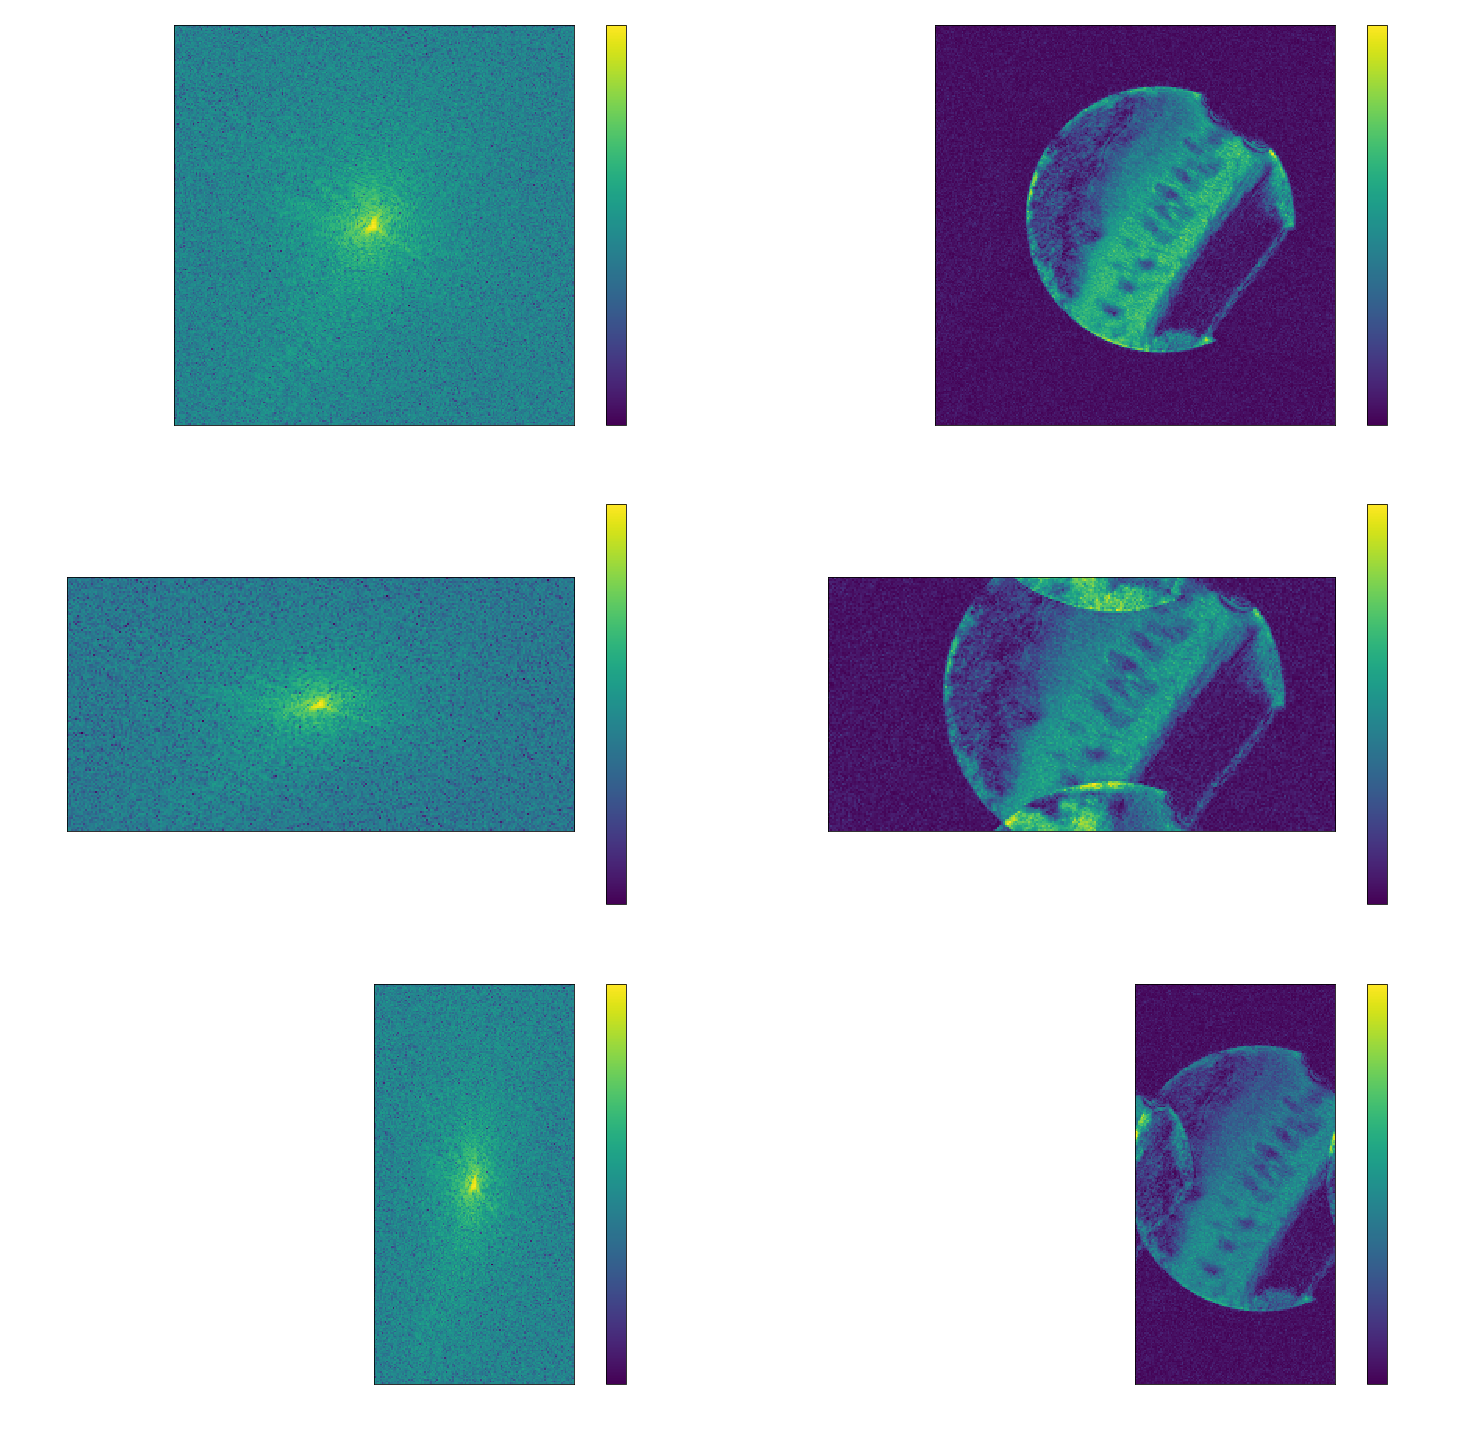

In [195]:
foldover_spaces = { 'Original K-space': k_sp,
            'FOV_reduction_row by 2': fh_2,
            'FOV_reduction_v by 2': fv_2,
            }
plot.comparison_k_plots(foldover_spaces)

The reduction in the FOV in the chosen k-space dimension led to the decrease of the size of the respective dimension in image space.

\begin{equation*}
Δw = 1 / {k}_{FOV}
\end{equation*}

For the above images, given that the parameters of frequency encoding and phase encoding range were defined to encompass the original FOV, a removal of the lines of k-space lead to lines that retained information from the respective phase and frequency encoding position to extend beyond the current field-of-view (smaller than original by factors 2 and 4).


Parts of k-space that possess frequencies less than the new minimum or more than the new maximum frequencies in the respective phase and frequency encoding directions are assigned to the opposite ends of the image as a shift of 2$\pi$ is added for frequencies smaller than the minimum and subtracted for frequencies larger than the maximum.

A smaller defined field of view as compared to the size of the image causes Wrap around or aliasing.

As such instead of sampling lesser points at a slow rate (low bandwidth) sampling greater points with faster rates (high bandwidth) will ensure an aquisition with greater FOV and intended region of interests.                                             